In [ ]:
import pandas as pd

file_path = '/content/livin_reviews.xlsx'
df = pd.read_excel(file_path)

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
display(df)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0,0d637d50-d078-4edd-b7e2-597c994f6cb2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap pertahankan mandiri,5,0,2.2.0,2025-06-21 05:42:46,"Halo Sahabat @Ilham Ridhoni, terima kasih atas...",2025-06-21 05:58:02,2.2.0
1,1,8a4a63d1-bf9c-4d11-88b6-14d422f23189,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat baik,5,0,2.2.0,2025-06-21 05:35:13,"Halo Sahabat @siak lawo, terima kasih atas rev...",2025-06-21 05:36:29,2.2.0
2,2,6439daf3-2e23-4b2a-b52d-041c182eac8d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,update aplikasi malah harus update hp jugaaa🥺,1,0,3.0.0,2025-06-21 05:30:12,"Halo Sahabat @Benny Bendoetz Hidayat, mohon ma...",2025-06-21 05:37:53,3.0.0
3,3,3365df6a-9cc2-41c3-8bf1-33bb3d0db5a6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi livin mandiri sy tdk bisa terbuka, kn...",5,0,2.2.0,2025-06-21 05:28:45,"Hi Sahabat @Randi, mohon maaf atas ketidaknyam...",2025-06-21 05:37:06,2.2.0
4,4,ea88bdc3-b8e5-4c48-a29f-32a239a74d25,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,setelah update jauh lebih ringan,5,0,3.0.0,2025-06-21 05:13:01,"Halo Sahabat @Aditia Yoga, terima kasih atas r...",2025-06-21 05:16:03,3.0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262484,262484,40fc5bf0-6aa5-489c-9db9-92989057d498,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantap,5,0,1.0.0,2021-09-30 07:02:21,Halo Bpk Apri terima kasih atas review yang te...,2021-09-30 07:48:49,1.0.0
262485,262485,e064d767-256a-4b47-8b34-af82ef7b1d81,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,5,0,NaN,2021-09-30 06:56:05,Terima kasih atas review yang telah diberikan ...,2021-09-30 07:48:02,NaN
262486,262486,40d443c4-ab6a-446a-be28-2aebc7efad62,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Keren. Cakep benar semakin canggih. Terdepan t...,5,22,1.0.0,2021-09-30 06:48:30,Terima kasih atas review yang telah diberikan ...,2021-09-30 07:15:22,1.0.0
262487,262487,867eb0a4-f14e-4f33-8aff-c8a2f1ce098e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Excellent,5,0,1.0.0,2021-09-30 06:33:15,Thank you for the review provided by Mrs Afnin...,2021-09-30 07:06:25,1.0.0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
all_text = ' '.join(df['content'].astype(str))
vectorizer = CountVectorizer()
word_counts = vectorizer.fit_transform([all_text])
word_list = vectorizer.get_feature_names_out()
count_list = word_counts.toarray().flatten()
word_index_df = pd.DataFrame({'word': word_list, 'count': count_list})
word_index_df = word_index_df.sort_values(by='count', ascending=False).reset_index(drop=True)
display(word_index_df)
word_index_df.to_csv('word_counts_index.csv', index=False)
print("Word index with counts exported to 'word_counts_index.csv'")

,word,count
0,bisa,56555
1,di,53407
2,saya,39851
3,livin,37647
4,sangat,36805
...,...,...
52070,𝚙𝚞𝚊𝚜𝚜𝚜𝚜,1
52071,𝚙𝚞𝚊𝚜,1
52072,𝚙𝚛𝚎𝚖𝚒𝚞𝚖,1
52073,𝚙𝚘𝚔𝚘𝚔𝚗𝚢𝚊,1


Word index with counts exported to 'word_counts_index.csv'


In [ ]:
df = df[['content', 'score']]
df = df.dropna()
df[['content', 'score']]

,content,score
0,mantap pertahankan mandiri,5
1,sangat baik,5
2,update aplikasi malah harus update hp jugaaa🥺,1
3,"aplikasi livin mandiri sy tdk bisa terbuka, kn...",5
4,setelah update jauh lebih ringan,5
...,...,...
262484,Mantap,5
262485,mantap,5
262486,Keren. Cakep benar semakin canggih. Terdepan t...,5
262487,Excellent,5


#Sentimen

In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df['sentiment'] = df['score'].apply(lambda x: 'positif' if x >= 4 else ('negatif' if x <= 2 else 'netral'))
display(df[['content', 'score', 'sentiment']])

,content,score,sentiment
0,mantap pertahankan mandiri,5,positif
1,sangat baik,5,positif
2,update aplikasi malah harus update hp jugaaa🥺,1,negatif
3,"aplikasi livin mandiri sy tdk bisa terbuka, kn...",5,positif
4,setelah update jauh lebih ringan,5,positif
...,...,...,...
262484,Mantap,5,positif
262485,mantap,5,positif
262486,Keren. Cakep benar semakin canggih. Terdepan t...,5,positif
262487,Excellent,5,positif


In [ ]:
df['score'].value_counts()

,count
score,
5,134589
1,73767
2,18526
4,17946
3,17661


<Axes: xlabel='score'>

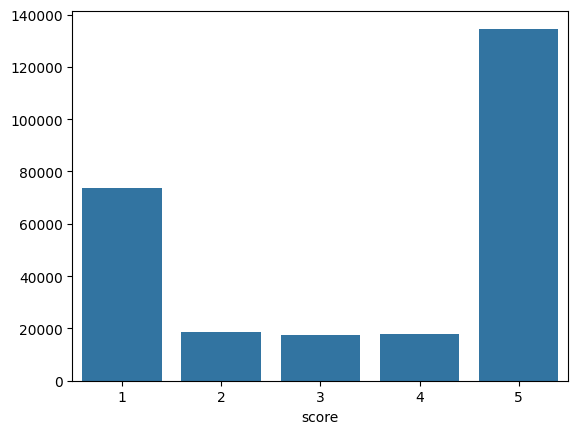

In [ ]:
import seaborn as sns
result = df.groupby(['score']).size()
sns.barplot(x = result.index, y = result.values)

In [ ]:
for sentiment_label, sentiment_df in df.groupby('sentiment'):
  print(f"Reviews with sentiment: {sentiment_label}")
  display(sentiment_df[['content']])

Reviews with sentiment: negatif


,content
2,update aplikasi malah harus update hp jugaaa🥺
10,"update baru Sampah, Ngapain Harus izin Kontak ..."
12,baik. tks
13,ini gimana mau melakukan investasi tapi malah ...
14,"teruntuk mandiri,, coba buat login aplikasi, v..."
...,...
262306,Mau daftar susah nya minta ampunn
262323,Tahun kelahiran enggak bisa diisi
262329,Mantaf apanya registrasi nya ribet banget
262354,"Maaf, saya ingin buka rekening di mandiri.. Ta..."


Reviews with sentiment: netral


,content
6,Setelah install ulang aplikasi saya jadi tidak...
8,kenapa Serang trasnfer k BRI adm nya jadi naik...
32,saya mau buka rekening via livin ini tapi sete...
56,mandiri yg telah diupdate tidak bisa diakses k...
61,"ko saya ga bisa login ke livin,knp ya?muncul t..."
...,...
262201,Saya sudah download saya login ga bisa gimana ...
262219,"Ini livin yg baru kah,yg lama GK bisa?apa gimqna?"
262235,Ini aplikasi beneran by Mandiri ???
262246,Lelet


Reviews with sentiment: positif


,content
0,mantap pertahankan mandiri
1,sangat baik
3,"aplikasi livin mandiri sy tdk bisa terbuka, kn..."
4,setelah update jauh lebih ringan
5,aplikasinya sangat bagus skali
...,...
262484,Mantap
262485,mantap
262486,Keren. Cakep benar semakin canggih. Terdepan t...
262487,Excellent


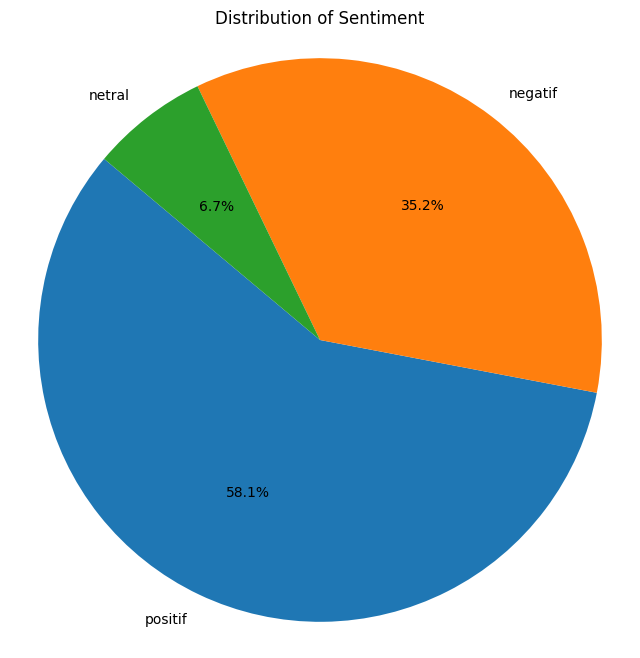

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment')
plt.axis('equal')
plt.show()

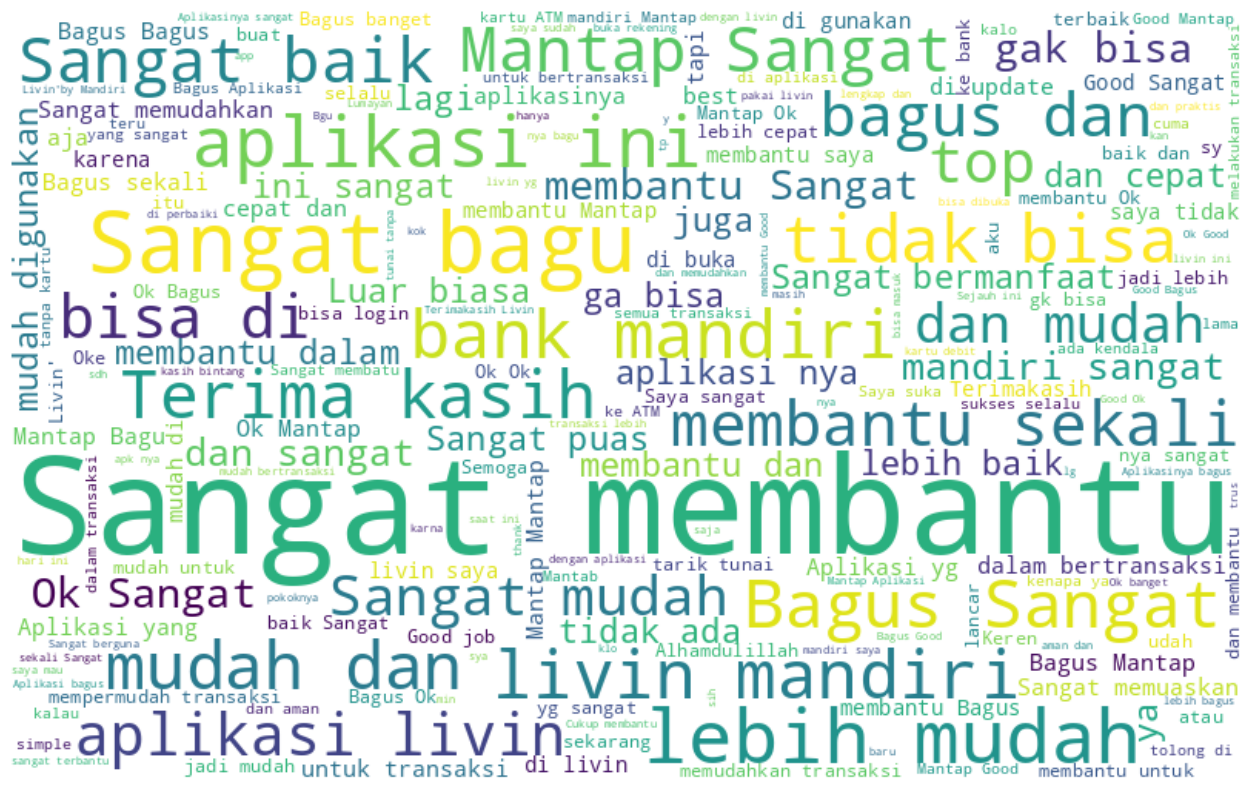

In [ ]:
df_p=df[df['sentiment']=='positif']
all_words_lem = ' '.join([word for word in df_p['content']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

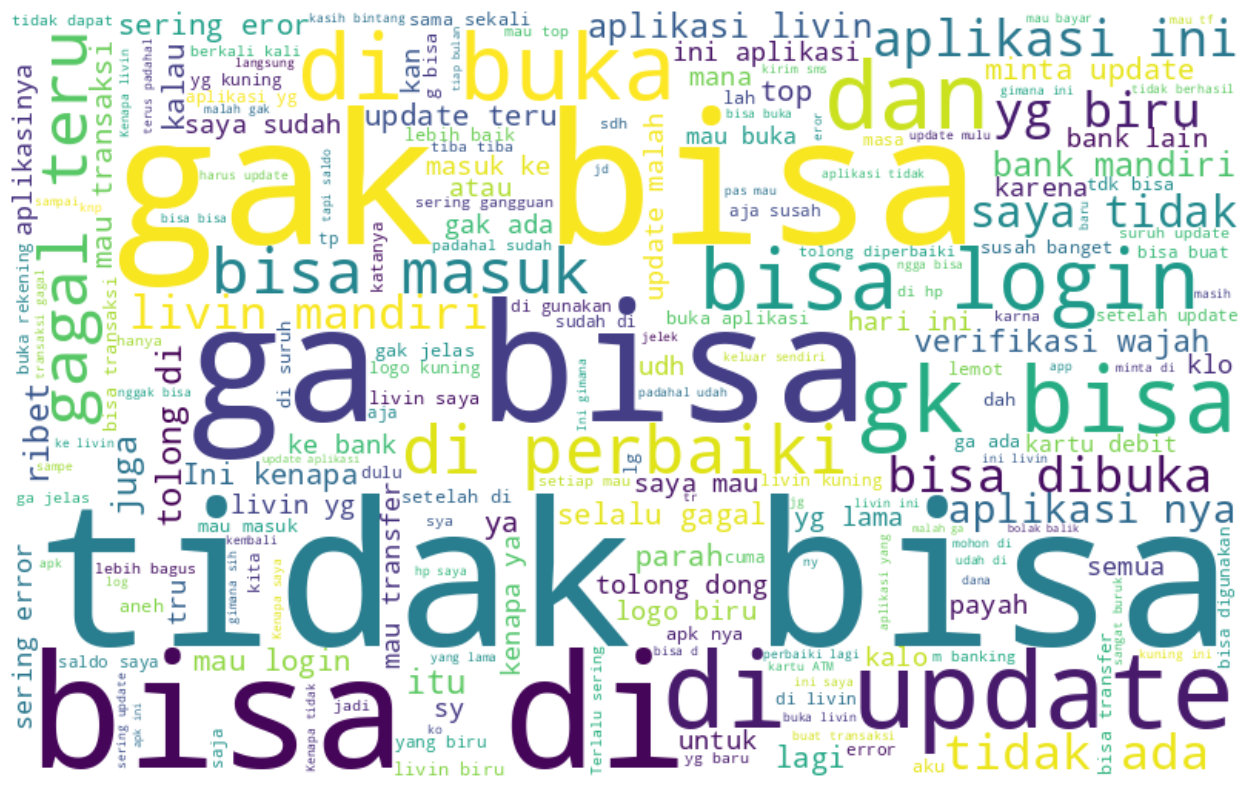

In [ ]:
df_p=df[df['sentiment']=='negatif']
all_words_lem = ' '.join([word for word in df_p['content']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

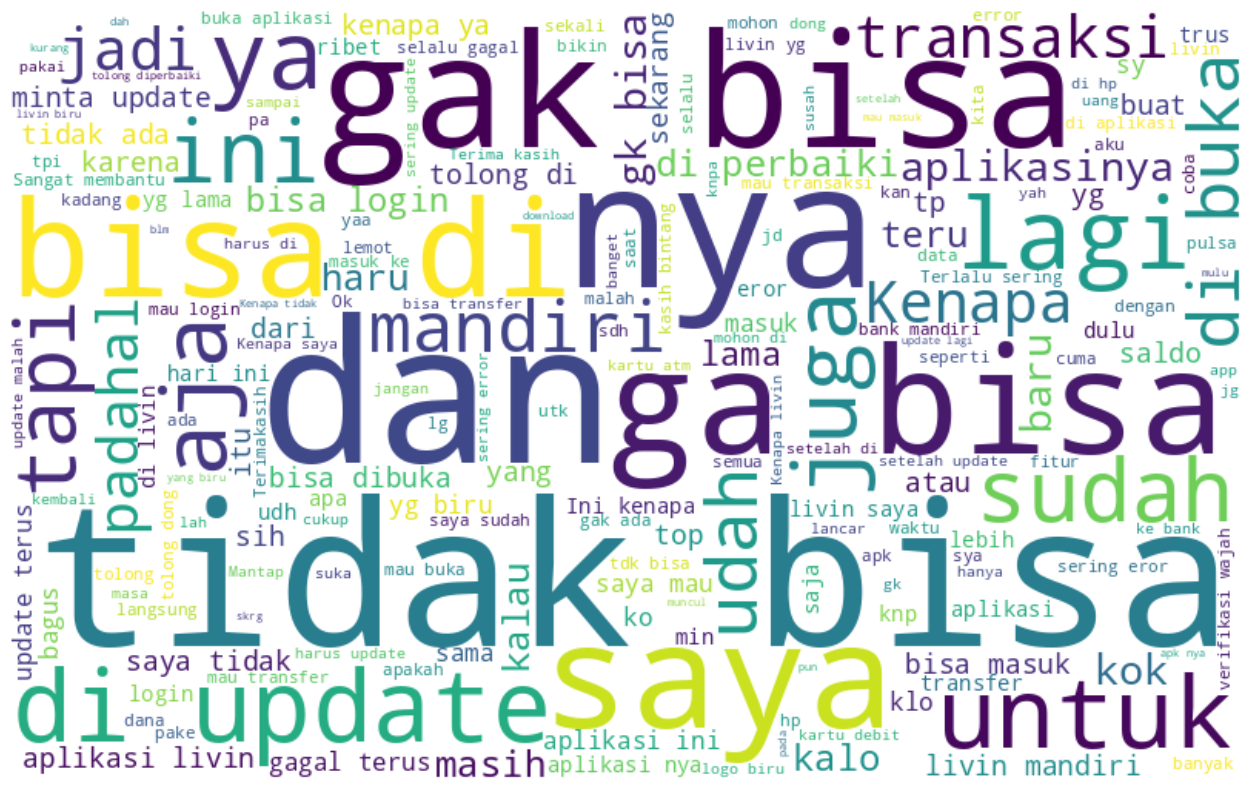

In [ ]:
df_p=df[df['sentiment']=='netral']
all_words_lem = ' '.join([word for word in df_p['content']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

#Groupin

In [ ]:
import re
keywords = [
    'anggaran', 'pengeluaran', 'budget', 'pembukuan', 'kas', 'jadual', 'jadwal', 'terjadual', 'terjadwal', 'autodebet', 'kantong',
    'bayar kredit', 'bulanan', 'pemasukan', 'finansial', 'alokasi', 'budgeting', 'spending', 'spent', 'save', 'saving',
    'dompet', 'spending', 'tagihan', 'hemat', 'terjadual',
    'catatan keuangan', 'pengingat', 'streak', 'nudges', 'laporan keuangan'
]
pattern = r'\b(?:' + '|'.join(re.escape(k) for k in keywords) + r')\b'
mask = df['content'].apply(lambda x: isinstance(x, str) and bool(re.search(pattern, x.lower())))
financial_reviews = df[mask]
print("Reviews containing financial keywords:")
display(financial_reviews[['content', 'score', 'sentiment']])

Reviews containing financial keywords:


,content,score,sentiment
84,"transasi terjadwal tidak bisa digunakan, saya ...",1,negatif
284,"Lama bener pengiriman kartu fisik debit njirr,...",2,negatif
397,minus ny cuma gk bs scan barcode buat beli tok...,5,positif
541,"udah lama setia pake livin, tapi baru kali ini...",1,negatif
568,Saya mau tanya kenapa sekarang potongan bulana...,3,netral
...,...,...,...
261626,ManTulllll banget pokoknya apk Baru dari Bank ...,5,positif
261874,"UI dengan fitur lebih baik dari sebelumnya, le...",5,positif
262185,Bagus banget tapi saya bingung mau tranfer dat...,5,positif
262220,"Satu aplikasi, segalanya easy. Nikmati gampang...",5,positif


In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
new_stopwords = {'yg', 'nya', 'ga', 'livin', 'livin mandiri', 'mandiri', 'dan', 'admin bulanan', 'kartu kredit'}
stop_words.update(new_stopwords)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

financial_reviews['cleaned_content'] = financial_reviews['content'].apply(clean_text)

print("\nCleaned financial reviews:")
display(financial_reviews[['content', 'cleaned_content', 'score', 'sentiment']])



Cleaned financial reviews:


/tmp/ipython-input-29-2487815248.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_reviews['cleaned_content'] = financial_reviews['content'].apply(clean_text)


,content,cleaned_content,score,sentiment
84,"transasi terjadwal tidak bisa digunakan, saya ...",transasi terjadwal kecewa,1,negatif
284,"Lama bener pengiriman kartu fisik debit njirr,...",bener pengiriman kartu fisik debit njirr gmna ...,2,negatif
397,minus ny cuma gk bs scan barcode buat beli tok...,minus ny gk bs scan barcode beli token listrik...,5,positif
541,"udah lama setia pake livin, tapi baru kali ini...",udah setia pake kali saldo tahan kejelasan tag...,1,negatif
568,Saya mau tanya kenapa sekarang potongan bulana...,potongan bulanan rp bikin kartu atm potonganny...,3,netral
...,...,...,...,...
261626,ManTulllll banget pokoknya apk Baru dari Bank ...,mantulllll banget pokoknya apk bank kemudahan ...,5,positif
261874,"UI dengan fitur lebih baik dari sebelumnya, le...",ui fitur mudah saldo saving kartu kredit simpl...,5,positif
262185,Bagus banget tapi saya bingung mau tranfer dat...,bagus banget bingung tranfer data riwayat reke...,5,positif
262220,"Satu aplikasi, segalanya easy. Nikmati gampang...",aplikasi easy nikmati gampangnya buka rekening...,5,positif


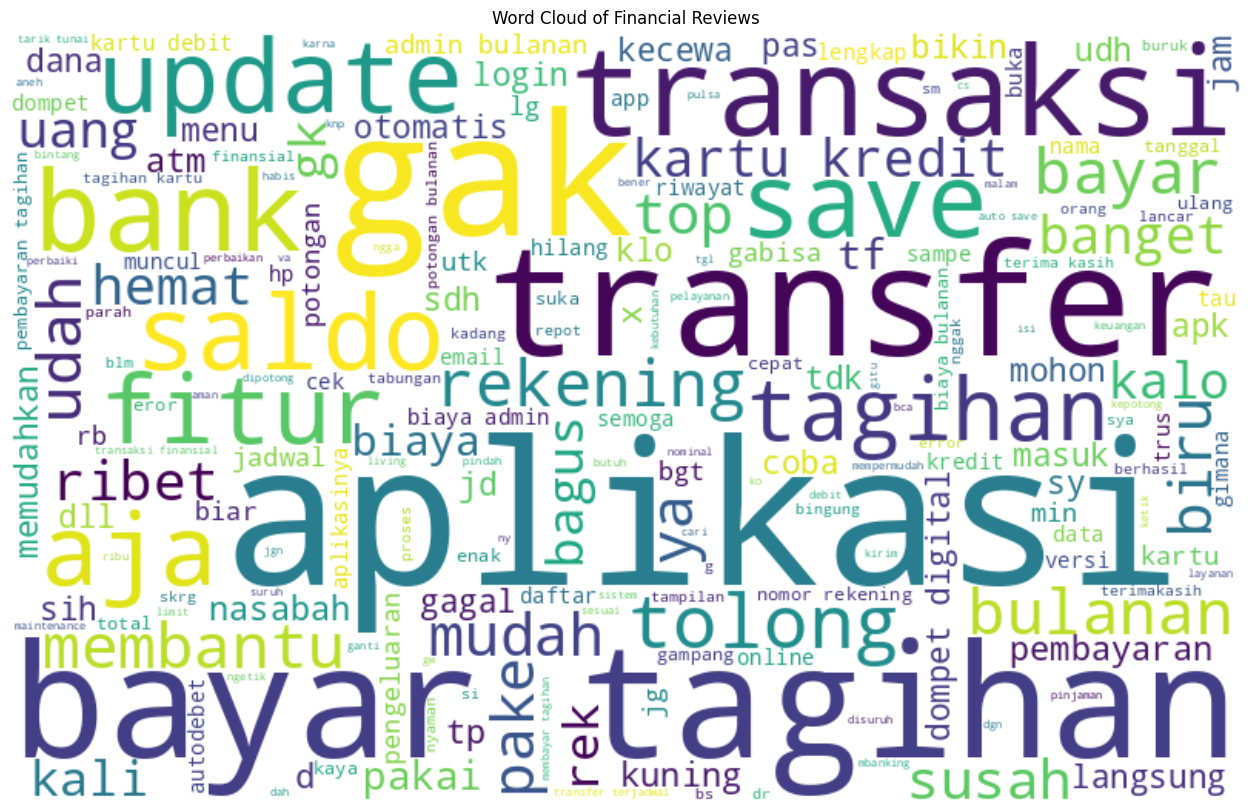

In [ ]:
import matplotlib.pyplot as plt
all_words_financial = ' '.join([str(review) for review in financial_reviews['cleaned_content']])

%matplotlib inline
wordcloud_financial = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_financial)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_financial, interpolation='bilinear')
plt.axis('off');
plt.title('Word Cloud of Financial Reviews')
plt.show()